In [11]:
from PaperTennis_env import PaperTennisEnv
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
import os.path
from os import path
import scipy.io
from collections import defaultdict

In [12]:
#Hyperparms
GAMMA = 0.9
E_GREEDY = 0.1

Startegies = {
    "Mean": 1,
    "Long": 2,
    "Short": 3,
    "Rand": 4,
}

In [66]:
# Run Parms !!!!!
OPP_Strat='Long'
Reset = True
NUM_EPISODES = 1000000

# Get Opponent Startegy index
OPPONENT = Startegies[OPP_Strat]

# Init or load value method
if Reset or not(path.exists(OPP_Strat + '_MC.p')):
    print('New Q Values Initialized...')
    Q_val = np.zeros([5,51,51,50])
    train_episodes = 0;
else:
    train_episodes, Q_val = pickle.load(open(OPP_Strat + '_MC.p', "rb" ) )

New Q Values Initialized...


In [56]:
# Get action e-greedy
def get_action(state,Q_val):
    if state[1] == 0:
        return 0

    p_epsilon = np.random.uniform(0,1)
    if p_epsilon < E_GREEDY:
        return np.argmax(np.random.uniform(0,1,(1,state[1]))) + 1

    q_s = np.zeros(state[1])

    for i in range(1,state[1]):
        q_s[i] = Q_val[state[0],state[1],state[2],i]

    return np.argmax(q_s) + 1

In [67]:
start_time = time.time()

# init env
env = PaperTennisEnv()

# Plotting Stuff
trend_wins = np.zeros(NUM_EPISODES-100)
wins = np.zeros(NUM_EPISODES)

Returns = np.zeros([5,51,51,50],dtype=object)
Counters = np.zeros([5,51,51,50],dtype=obje   t)

for episode in range(NUM_EPISODES):

    env.reset()
    
    done = False

    # Generate an episode
    state_list = list()
    action_list = list()
    reward_list = list()
    total_reward = 0
    error_episode = 0
    
    state = env.state
    G = 0
    while not done:
        
        state_list.append(state)
        
        action = get_action(state,Q_val)
        
        state, reward, done = env.step(action,OPPONENT)
        
        action_list.append(action)
        reward_list.append(reward)

        if (done and reward == 1):
            wins[episode] = 1
            
    for t in range(0,len(state_list)):
        G = GAMMA * G + reward_list[t]
        Returns[state_list[t][0],state_list[t][1],state_list[t][2],action_list[t]-1] += G
        Counters[state_list[t][0],state_list[t][1],state_list[t][2],action_list[t]-1] += 1
        Q_val[state_list[t][0],state_list[t][1],state_list[t][2],action_list[t]-1] = Returns[state_list[t][0],state_list[t][1],state_list[t][2],action_list[t]-1]/Counters[state_list[t][0],state_list[t][1],state_list[t][2],action_list[t]-1]

    if episode >= 100:
        trend_wins[episode-100] = np.sum(wins[episode-100:episode])
    
    if episode%10000 == 0: print("Episode %d completed with reward %d" % (episode, reward))
 
        
# # Save Q-val Table and episode count
# pickle.dump([train_episodes,Q_val], open(OPP_Strat + '.p', "wb" ) )

# Print run details
print("--- %s seconds ---" % (time.time() - start_time))
print("Final mean win percent = %s " % (np.mean(trend_wins[-10000:])))
print("Zero Q-Vals = %s " % (np.count_nonzero(Q_val==0)))
# print("Total Episodes %s " % (train_episodes))

Episode 0 completed with reward -1
Episode 10000 completed with reward -1
Episode 20000 completed with reward 1
Episode 30000 completed with reward 1
Episode 40000 completed with reward 1
Episode 50000 completed with reward 1
Episode 60000 completed with reward 1
Episode 70000 completed with reward 1
Episode 80000 completed with reward -1
Episode 90000 completed with reward 1
Episode 100000 completed with reward 1
Episode 110000 completed with reward 1
Episode 120000 completed with reward -1
Episode 130000 completed with reward 1
Episode 140000 completed with reward 1
Episode 150000 completed with reward 1
Episode 160000 completed with reward 1
Episode 170000 completed with reward 1
Episode 180000 completed with reward -1
Episode 190000 completed with reward 1
Episode 200000 completed with reward -1
Episode 210000 completed with reward 1
Episode 220000 completed with reward 1
Episode 230000 completed with reward 1
Episode 240000 completed with reward -1
Episode 250000 completed with re

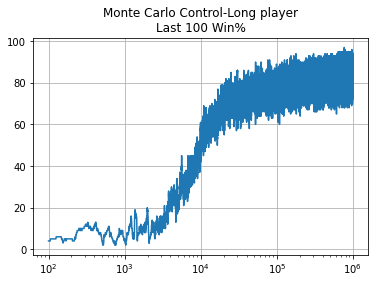

In [68]:
plt.plot(range(100,NUM_EPISODES),trend_wins)
plt.title('Monte Carlo Control-' +  OPP_Strat + ' player\nLast 100 Win%')
plt.xscale('log')
plt.grid()

In [29]:
env.state

(0, 50, 50)